# The Array-Backed List

## Agenda

1. The List **Abstract Data Type** (ADT)
2. A List **Data Structure**
3. Our List API
4. Getting started
5. NumPy arrays
6. The `ArrayList` data structure
7. Runtime analysis

## 1. The List **Abstract Data Type** (ADT)

An **abstract data type (ADT)** defines a *conceptual model* for how data may be stored and accessed.

A **list ADT** is a data container where:

- values are ordered in a *sequence*
- each value has at most one preceding and one succeeding value
- a given value may appear more than once in a list

Other common ADTs (some of which we'll explore later) include:

- Stacks
- Queues
- Priority Queues
- Maps
- Graphs

## 2. A List **Data Structure**

A **list data structure** is a *concrete implementation* of the list ADT in some programming language, which, in addition to adhering to the basic premises of the ADT, will also typically support operations that:

- access values in the list by their position (index)
- append and insert new values into the list
- remove values from the list

The implementation of any data structure will generally rely on simpler, constituent data types (e.g., "primitive" types offered by the language), the choice of which may affect the runtime complexities of said operations.

## 3. The List API

The operations we'll be building into our list data structures will be based on the [common](https://docs.python.org/3.6/library/stdtypes.html#common-sequence-operations) and [mutable](https://docs.python.org/3.6/library/stdtypes.html#mutable-sequence-types) sequence operations defined by the Python library.

In [ ]:
class List:        
    ### subscript-based access ###
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        pass

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        pass

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        pass
    
    ### stringification ###
            
    def __repr__(self):
        """Supports inspection"""
        return '[]'
    
    def __str__(self):
        """Implements `str(self)`"""
        return '[]'

    ### single-element manipulation ###
    
    def append(self, value):
        pass
    
    def insert(self, idx, value):
        pass
    
    def pop(self, idx=-1):
        pass
    
    def remove(self, value):
        pass
    
    ### predicates (T/F queries) ###
    
    def __eq__(self, other):
        """Implements `self == other`"""
        return True

    def __contains__(self, value):
        """Implements `val in self`"""
        return True
    
    ### queries ###
    
    def __len__(self):
        """Implements `len(self)`"""
        return len(self.data)
    
    def min(self):
        pass
    
    def max(self):
        pass
    
    def index(self, value, i, j):
        pass
    
    def count(self, value):
        pass

    ### bulk operations ###

    def __add__(self, other):
        """Implements `self + other_array_list`"""
        return self
    
    def clear(self):
        pass
    
    def copy(self):
        pass

    def extend(self, other):
        pass

    ### iteration ###
    
    def __iter__(self):
        """Supports iteration (via `iter(self)`)"""
        pass

## 4. Getting started

In [1]:
class List:
    def append(self, value):
        self.val = value
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        return self.val

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        self.val = value
    
    def __repr__(self):
        """Supports inspection"""
        return f'[{repr(self.val)}]'

In [2]:
l = List()
l.append(42)
l

[42]

In [3]:
l[0]

42

In [4]:
l[0] = 331

In [7]:
l[100]

331

In [6]:
l

[331]

Of course, we need our list implementation to hold more than a single element. The obvious solution for this is to use an *array*.

## 5. NumPy arrays

Python does not come with a built-in array type. Instead, we're going to make use of the array implementation provided by the [NumPy scientific computing package](https://numpy.org/doc/stable/user/absolute_beginners.html).

To create a NumPy array of size N, we can do:

In [8]:
import numpy as np

N = 10
arr = np.empty(N, dtype=object)

The `dtype=object` specification indicates that we want to use the array to store references to arbitrary Python objects. The `empty` function creates an array of the specified size, but leaves all elements uninitialized.

We can now manipulate elements in the array by index, as we are accustomed to doing. 

In [9]:
for i in range(10):
    arr[i] = 2**i

arr[5]  = 'hello'
arr[9] = 'world'

In [10]:
arr

array([1, 2, 4, 8, 16, 'hello', 64, 128, 256, 'world'], dtype=object)

While NumPy defines functions on arrays for appending, inserting, and deleting elements, we will not be using any of them. This is because each of these functions operates by creating a new array, copying the resulting elements over, then deleting the original array. This is both space and time inefficient! Instead, we will implement these operations ourselves -- optimizing them when possible -- within our own list class.

## 6. The `ArrayList` data structure

Our list data structure will make use of a NumPy array as its backing data store. This array will have a fixed initial size, but as elements are added to the list it may become necessary to create a new, larger backing array and copy our elements over. Each time we create a new backing array, we will *double the capacity of the original* -- this may seem arbitrary now, but we will see why it is a critical detail later on!

In [11]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value):
        if self.size == len(self.data): # check if backing array is full
            ndata = np.empty(len(self.data) * 2, dtype=object) # new array, twice the size
            for i in range(len(self.data)):
                ndata[i] = self.data[i] # copy values over
            self.data = ndata # replace our backing array with the new one

        self.data[self.size] = value
        self.size += 1


    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]
    

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value
        

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        for i in range(idx, self.size - 1):
            self.data[i] = self.data[i+1]
        self.size -= 1
        
    
    def __len__(self):
        """Implements `len(self)`"""
        return self.size
    
    
    def __repr__(self):
        """Supports inspection"""
        return '[' + ','.join(repr(self.data[i]) for i in range(self.size)) + ']'

In [12]:
l = ArrayList()
for x in range(10):
    l.append(x)
l

[0,1,2,3,4,5,6,7,8,9]

In [13]:
l[0] = 'hello'
l[-1] = 'world'
l

['hello',1,2,3,4,5,6,7,8,'world']

In [14]:
l[2] = 'two'
l[-3] = 'seven'
l

['hello',1,'two',3,4,5,6,'seven',8,'world']

In [15]:
del l[5]
l

['hello',1,'two',3,4,6,'seven',8,'world']

In [16]:
del l[0]
del l[-1]
l

[1,'two',3,4,6,'seven',8]

In [17]:
len(l)

7

## 7. Runtime analysis

- Indexing: Recall that array-indexing is a $O(1)$ operation. This translates into $O(1)$ runtime for both `__getitem__` and `__setitem__`.

- Search (unsorted): In an unsorted array-backed list, linear search is required, which $O(N)$. 

- Search (sorted): In a sorted array-backed list, we can use binary search, which is $O(\log N)$.

- Deletion: The worst case for `__delitem__` occurs when we delete the element at index 0. This requires $N-1$ shifts, which is $O(N)$.

- Append:

   - If the backing array is not full, we just copy the given value into the array — this is $O(1)$ (cheap!).
   
   - Otherwise, we must copy everything to a new array along with the given value — this is $O(N)$ (expensive!), A naive interpretation points to this behavior yielding a $O(N)$ append.
   
   - But we only need to copy to new arrays (increasingly) rarely! A more sophisticated analysis pits the occasional costly, slow operation against the many more cheap, constant time ones. Can we distribute (aka *amortize*) the time used for the costly operations over the many cheap ones such that, on average, we can say that append is better than $O(N)$?
   
       - Assuming we start with an array of size 1 and double the array whenever we hit capacity, consider the cost (i.e., number of copies) incurred as we keep appending elements to the list:
       
               Append #:  1  2  3  4  5  6  7  8   9  10  11  12  13  14  15  16  17  18  19  20 ...
               Capacity:  1  2  4  4  8  8  8  8  16  16  16  16  16  16  16  16  32  32  32  32 ...
               Cost:      1  2  3  1  5  1  1  1   9   1   1   1   1   1   1   1  17   1   1   1 ...
               
       - Let's try to answer the amortization question directly. As we move through the appends, let us imagine that when we are dealing with a cheap operation we can "save" some extra credits to use to "pay" for an expensive operation when we get to it. Is there some amount of extra credit that will make this work?
       
           - It turns out that if we simply attribute a cost of 3 to every operation, either saving/paying out credits as necessary, this works out nicely:
       
                   Append #:             1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 ...
                   Actual cost:          1   2   3   1   5   1   1   1   9   1   1   1   1   1   1   1  17   1   1   1 ...
                   -------------------------------------------------------------------------------------------------------
                   Credits saved/paid:  +2  +1   0  +2  -2  +2  +2  +2  -6  +2  +2  +2  +2  +2  +2  +2 -14  +2  +2  +2 ...
                   Attributed cost:      3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 ...
                   Credits accumulated:  2   3   3   5   3   5   7   9   3   5   7   9  11  13  15  17   3   5   7   9 ...

           - We can also think of the 3 credits paid to append the element at position $i$ as being spent thusly:
           
               - One credit is paid to copy the element itself into the array
               - One credit is paid to move the element to a new array the first time it needs to happen
               - One credit is used to pay to move the element at position $i-2^j$ (where $2^j$ is the largest power of 2 less than $i$) to a new array
               
           We conclude by saying that append is $O(1)$ amortized.
                        
       - For a more mathematical proof, consider the cost of the $i\text{th}$ append operation:

         $$
         c_i = \begin{cases}
            i, & \text{if } i-1 \text{ is a power of 2}\\
            1, & \text{otherwise}
            \end{cases}
         $$
         
         If we consider the total cost of performing $N$ successive appends, each operation requires at least 1 copy (summing to $N$), and $\log_2 N$ of the operations perform additional (power of 2) copies to new arrays. It should be clear that:
         
         $$\sum_{i=1}^N c_i \le N + \sum_{j=0}^{\lfloor \log_2 N \rfloor} 2^j$$
         
         The righthand sum is a geometric series, which converges like so:
         
         $$\sum_{j=0}^{n} r^j = \frac{1-r^{n+1}}{1-r}$$
         
         Substituting $2$ for $r$, we find that $\sum_{j=0}^{\lfloor \log_2 N \rfloor} 2^j = 2N - 1$, which tells us that:
         
         $$\sum_{i=1}^N c_i \le 3N - 1$$
         
         And so we can conclude that:
         
         $$\sum_{i=1}^N c_i = O(N)$$
         
         This says that appending $N$ elements is $O(N)$, and so appending each individual element is clearly $O(1)$ amortized.
         
- Insertion: same as append when it comes to copying to a new array (amortized runtime of $O(1)$), but insertion itself requires up to $N$ shifts, and so is $O(N)$.


### Not doubling?

If we chose to expand the array by a constant amount instead of doubling it, would we still have $O(1)$ amortized runtime for append?

In [18]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value, doubling=True):
        if self.size == len(self.data):
            if doubling:
                ndata = np.empty(len(self.data)*2, dtype=object)
            else:
                ndata = np.empty(len(self.data)+1000, dtype=object)
            for i in range(len(self.data)):
                ndata[i] = self.data[i]
            self.data = ndata
            
        self.data[self.size] = value
        self.size += 1

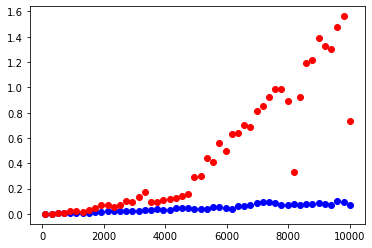

In [19]:
import timeit
import matplotlib.pyplot as plt

ns = np.linspace(100, 10_000, 50, dtype=int)
ts1 = [timeit.timeit(stmt=f'for _ in range({n}): lst.append(None, doubling=True)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10)
       for n in ns]
ts2 = [timeit.timeit(stmt=f'for _ in range({n}): lst.append(None, doubling=False)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10)
       for n in ns]

plt.plot(ns, ts1, 'ob')
plt.plot(ns, ts2, 'or');

No! We will not prove it, but expanding the array by a constant amount leads to a total cost of $O(N^2)$ for $N$ appends, which gives a $O(N)$ amortized runtime for append. Definitely not good!